In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from PIL import Image
path_image = '/home/gris/Data/Multishape/'
im = np.asarray(Image.open(path_image + "Lung_mask.tif"))


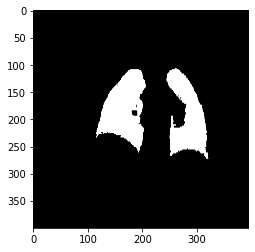

In [4]:
plt.imshow(im, vmin=0, vmax=1)

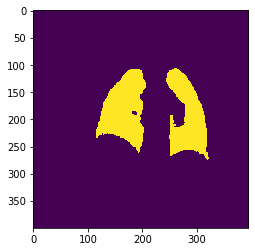

In [5]:
# making the greyscale segmentation a binary image, by setting all values below/above a threshold to 0/1
im2 = np.zeros(im.shape[0:2], dtype=im.dtype)
im2[im[:,:,0]>0.5] = 1
plt.imshow(im2, vmin=0, vmax=1)

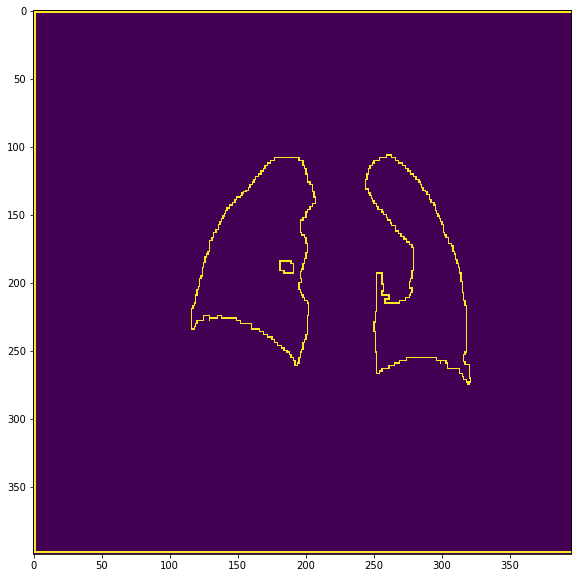

In [6]:
from scipy.ndimage.morphology import binary_dilation, binary_erosion

# dilation sets every pixel that is not completely surrounded by 1s to zero, so the boundary is removed
k = np.ones((3,3),dtype=int) 
out = binary_dilation(im2==0, k) & im2 

plt.figure(figsize=(10,10))
plt.imshow(out, vmin=0, vmax=1)

In [7]:
# remove the ones on the outer edges of image
out[0:2,:] = 0
out[:,0:2] = 0
out[-2, :] = 0
#remove the circle in left lung
out[180:195, 180:195] = 0

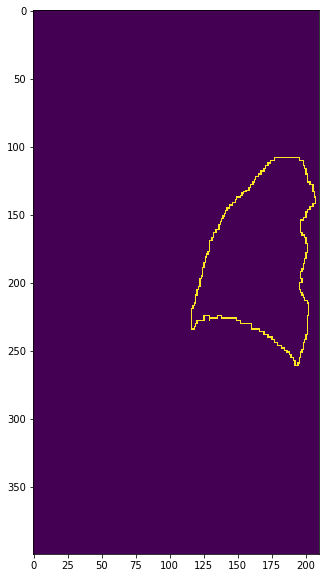

In [8]:

plt.figure(figsize=(10,10))
plt.imshow(out[:, :210], vmin=0, vmax=1)

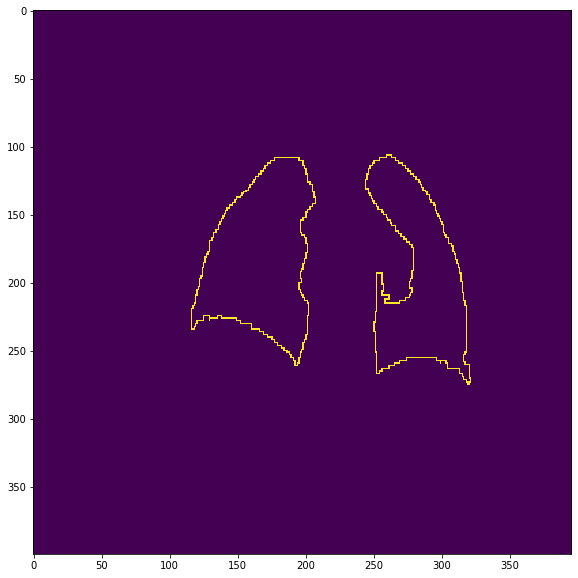

In [9]:

plt.figure(figsize=(10,10))
plt.imshow(out, vmin=0, vmax=1)

In [10]:
# extract points for left lung boundary
boundary0 = np.where(out[:,:210]==1)
out[:,:210] = 0
boundary1 = np.where(out==1)

In [19]:
boundary0

(array([108, 108, 108, 108, 108, 108, 108, 108, 108, 108, 108, 108, 108,
        108, 108, 108, 108, 108, 108, 109, 109, 110, 110, 110, 110, 110,
        110, 110, 110, 111, 111, 112, 112, 112, 112, 113, 113, 114, 114,
        114, 114, 114, 115, 115, 116, 116, 116, 116, 117, 117, 118, 118,
        118, 118, 119, 119, 120, 120, 120, 120, 120, 121, 121, 122, 122,
        122, 122, 123, 123, 124, 124, 124, 125, 125, 126, 126, 126, 126,
        126, 127, 127, 128, 128, 128, 128, 128, 128, 129, 129, 130, 130,
        130, 131, 131, 132, 132, 132, 132, 133, 133, 133, 133, 133, 134,
        134, 134, 135, 135, 136, 136, 136, 137, 137, 137, 137, 137, 137,
        138, 138, 139, 139, 139, 140, 140, 141, 141, 141, 141, 142, 142,
        142, 142, 143, 143, 143, 143, 144, 144, 144, 144, 145, 145, 145,
        145, 146, 146, 146, 146, 147, 147, 147, 148, 148, 148, 149, 149,
        149, 150, 150, 151, 151, 151, 152, 152, 152, 152, 153, 153, 153,
        154, 154, 154, 154, 155, 155, 155, 156, 156

In [11]:
from numpy import savetxt
savetxt('boundary0.csv', boundary0, delimiter=',')
savetxt('boundary1.csv', boundary1, delimiter=',')